3-4

In [135]:
%pip install numpy
%pip install pandas
%pip install pickle
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [136]:
import numpy as np
import pandas as pd
import pickle

3層ニューラルネットの実装

In [137]:
#設計
def sigmoid(x):
    return 1/(1+np.exp(-x))
def identity_function(x):
    return x
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])

    return network
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']

    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)

    return y

In [138]:
#実装
network=init_network()
x=np.array([1.0,0.5])
forward(network,x)

array([0.31682708, 0.69627909])

3-5 出力層の設計

In [139]:
a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [140]:
sum_exp_a=sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [141]:
exp_a/sum_exp_a

array([0.01821127, 0.24519181, 0.73659691])

In [142]:
#ソフトマックス関数の実装(仮)
def softmax(a):
    exp_a=np.exp(a)
    exp_a_sum=sum(exp_a)
    return exp_a/exp_a_sum

In [143]:
a=np.array([1010,1000,990])
softmax(a)
c=np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

/var/folders/4s/g5jfy6yd0r5d8pcvsfwjr7v00000gn/T/ipykernel_97439/2100727282.py:3: RuntimeWarning: overflow encountered in exp
  exp_a=np.exp(a)
/var/folders/4s/g5jfy6yd0r5d8pcvsfwjr7v00000gn/T/ipykernel_97439/2100727282.py:5: RuntimeWarning: invalid value encountered in divide
  return exp_a/exp_a_sum


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [144]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    exp_a_sum=np.sum(exp_a)
    y=exp_a/exp_a_sum

    return y

In [145]:
a=np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [146]:
np.sum(softmax(a))

np.float64(1.0)

3-6　手書き数字認識

In [147]:
import sys, os

# カレントディレクトリ確認
print("CWD:", os.getcwd())

# すでに追加されてるsys.pathを確認（デバッグ用）
print("Before sys.path:", sys.path)

# 一度重複を防ぐためにクリア（必要なら）
while './deep-learning-from-scratch-master' in sys.path:
    sys.path.remove('./deep-learning-from-scratch-master')

# 絶対パスを追加（ここが最重要！）
abs_path = '/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master'
if abs_path not in sys.path:
    sys.path.insert(0, abs_path)

print("After sys.path:", sys.path)

# ここでimport（失敗したらエラー出る）
from dataset.mnist import load_mnist

print("✅ import成功！")

CWD: /Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning
Before sys.path: ['/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master', '/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/.venv/lib/python3.13/site-packages', '..']
After sys.path: ['/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master', '/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/opt/homebrew/Cellar/python@3.13/3.

In [148]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


In [149]:
def get_data():
    (x_train,t_train),(x_test,t_test)=\
        load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test
def init_network():
    with open('/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master/ch03/sample_weight.pkl','rb') as f:
        network=pickle.load(f)
    return network
def predict(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']

    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)

    return y

In [150]:
x,t=get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network,x[i])
    p=np.argmax(y) 
    if p==t[i]:
        accuracy_cnt += 1
print('accuracy'+str(accuracy_cnt/len(x)))


accuracy0.9352


In [151]:
x,_=get_data() #画像のデータと正解ラベルがある
network=init_network()
W1,W2,W3=network['W1'],network['W2'],network['W3']

In [152]:
x,t=get_data()
network=init_network()

batch_size=100
accuracy_cnt=0

for i in range(0,len(x),batch_size): #100刻みにiをとってくる
    x_batch=x[i:i+batch_size]
    y_batch=predict(network,x_batch)
    p=np.argmax(y_batch,axis=1) #最大の値のインデックス
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print(accuracy_cnt/len(x))


0.9352


4 ニューラルネットワークの学習

In [153]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t=[0,0,1,0,0,0,0,0,0,0]

In [154]:
# 損失関数の実装　これの値が小さい方が損失小さい→良い
def sum_squard_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [155]:
sum_squard_error(np.array(y),np.array(t))

np.float64(0.09750000000000003)

In [156]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [157]:
cross_entropy_error(np.array(y),np.array(t))

np.float64(0.510825457099338)

In [158]:
(x_train,t_train),(x_test,y_test)=load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [159]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [160]:
# y,tがバッチの時のクロスエントロピー誤差
def cross_entropy_error(y,t):
    delta=1e-7
    if y.ndim==1: #列持ちから行持ちに変更することで一括で処理できるようにする
        y=y.reshape(1,y.size)
        t=t.reshape(1,t.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size
    

In [161]:
# 微分のコード

def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [162]:
def function_1(x):
    return 0.01*x**2+0.1*x

In [163]:
import matplotlib.pyplot as plt

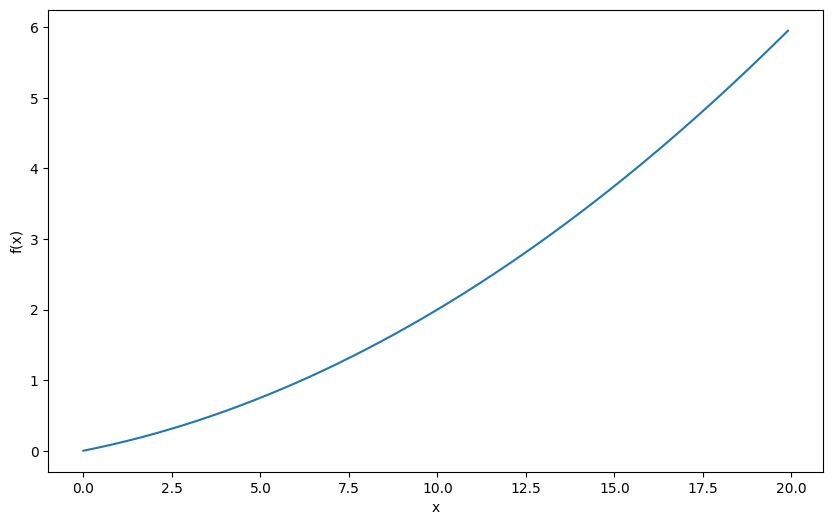

In [164]:
plt.figure(figsize=(10,6))
x=np.arange(0,20,0.1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,function_1(x))

In [165]:
numerical_diff(function_1,5)

0.1999999999990898

In [166]:
numerical_diff(function_1,10)

0.2999999999986347

In [167]:
def function_2(x):
    return x[0]**2+x[1]**2

In [ ]:
def numerical_gradient(f,x):
    #xとして与えるのは偏微分を求める点の配列
    h=1e-4
    grad=np.zeros(x.shape[0])
    for idx in range(x.size):#各変数ごとに処理を回す
        tmp_val=x[idx]
        x[idx]=tmp_val+h
        fxh1=f(x)

        x[idx]=tmp_val-h
        fxh2=f(x)

        grad[idx]=(fxh1-fxh2)/(2*h) #偏微分を入れる配列にぶち込む
        x[idx]=tmp_val

    return grad

In [171]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [178]:
#極小となるxを求める
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x=x-lr*grad
    return x

In [177]:
def function_2(x):
    return np.sum(x**2)

In [179]:
gradient_descent(function_2,np.array([-3,4]),lr=0.1)

array([ 6.35809854e-07, -8.90184721e-07])

In [ ]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self): 
        self.W=np.random.randn(2,3) #Wは重みを表すもの
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)

        return loss

In [189]:
net=simpleNet()
print(net.W)
x=np.array([0.6,0.9])
p=net.predict(x)
print(p) 

[[ 0.7381004  -0.569521   -0.22192402]
 [-0.14108886  0.17070506  0.11067964]]
[ 0.31588027 -0.18807804 -0.03354274]


In [190]:
t=np.array([0,0,1])
net.loss(x,t)

np.float64(1.186336543255385)

In [193]:
def f(W):
    return net.loss(x,t)
dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.25982685  0.15697038 -0.41679724]
 [ 0.38974028  0.23545558 -0.62519586]]


In [ ]:
#適当に重みを作って、その数字を元に勾配降下をして最適解を見つけるっていう時間

In [194]:
class TwoLayerNet:

    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.1):
        #重みの初期化
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']

        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)

        return y

    def loss(self,x,t):
        y=self.predict(x)

        return cross_entropy_error(y,t)

    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)

        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy

    def numerical_gradient(self,x,t):
        loss_W=lambda W : self.loss(x,t)

        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])     
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])     
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])     

        return grads
        

In [199]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)